In [34]:
# import the libraries 

import tensorflow as tf
print(tf.__version__)

2.4.0


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# to split train and test 

from sklearn.model_selection import train_test_split

In [37]:
# import Tensorflow libraries 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input ,GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D , MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [38]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [41]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.columns = ['labels','data']

In [43]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
# Create binary labels (0 and 1)

df['b_labels']=df['labels'].map({'ham':0,'spam':1})
y = df['b_labels'].values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
# split the data 

x_train,x_test,y_train,y_test = train_test_split(df['data'],y,test_size=0.3)

In [47]:
# Convert sentence to sequence 
# bag of words
max_vocab_size = 20000
tokenizer = Tokenizer(num_words =max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_text = tokenizer.texts_to_sequences(x_test)


In [48]:
sequence_train[0]

[638,
 285,
 1538,
 916,
 18,
 485,
 1859,
 299,
 775,
 1300,
 158,
 37,
 1301,
 46,
 16,
 720,
 18,
 776,
 25,
 835,
 3519]

In [49]:
len(sequence_train[0])

21

In [50]:
len(sequence_train[1])

22

In [51]:
# vocabulary 

word2idx = tokenizer.word_index
v = len(word2idx)
print('Total number of unique tokens are: %s' %v)

Total number of unique tokens are: 7408


In [52]:
# pad sequences to get N x T matrix 

data_train = pad_sequences(sequence_train)
print('Shape of data train tensor :',data_train.shape)

Shape of data train tensor : (3900, 189)


In [53]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [54]:
len(data_train[0])

189

In [55]:
len(data_train[1])

189

In [56]:
# set the value of T to get sequence length 

T = data_train.shape[1]
print(T)

189


In [57]:
# pad sequence to test set

data_test = pad_sequences(sequence_text,maxlen=T)
#maxlen = T to truncate longer sentences in text set 
print('shape of data test tensor',data_text.shape)

shape of data test tensor (1672, 189)


In [58]:
# Building the model

# create the model

# choose embedding dimensionality 
D = 20 # this is a hyper parameter , we can choose any word vector size that we want

# input layer 

i= Input(shape=(T,)) #input layer takes in sequence of integers so shape is T

#Embedding layer 

x = Embedding (v+1,D)(i) # this takes in sequence of integers and returns sequence of word vectors 
# this will be an N x T x D array 
# we want size of embedding to (v+1)xn because first word index starts from 1 and not 0

# First CNN layer 

x= Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

# second CNN layer 

x= Conv1D(64,3, activation='relu')(x)
x= MaxPooling1D(3)(x)

# Third CNN layer 
x= Conv1D(128,3,activation='relu')(x)
x= GlobalMaxPool1D()(x)

# dense layer 

x = Dense (1,activation='sigmoid')(x)

model =  Model(i,x)


In [59]:
# compile the model

model.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [60]:
# train the model

r = model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

Epoch 1/5
122/122 [==============================] - 3s 19ms/step - loss: 0.4702 - accuracy: 0.8502 - val_loss: 0.2758 - val_accuracy: 0.8618
Epoch 2/5
122/122 [==============================] - 2s 17ms/step - loss: 0.1536 - accuracy: 0.9306 - val_loss: 0.0800 - val_accuracy: 0.9797
Epoch 3/5
122/122 [==============================] - 2s 17ms/step - loss: 0.0169 - accuracy: 0.9962 - val_loss: 0.0713 - val_accuracy: 0.9785
Epoch 4/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0752 - val_accuracy: 0.9833
Epoch 5/5
122/122 [==============================] - 2s 17ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0683 - val_accuracy: 0.9844


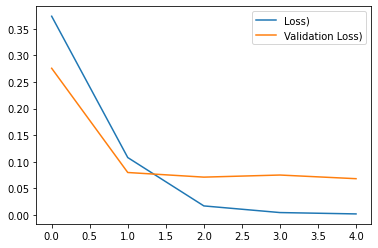

In [61]:
# loss per iteration 

import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss)')
plt.plot(r.history['val_loss'],label='Validation Loss)')
plt.legend()
plt.show()

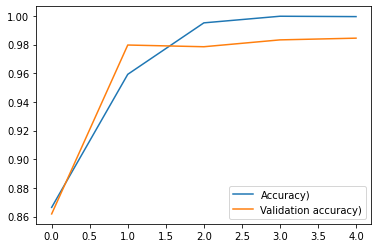

In [62]:
# accuracy per iteration

plt.plot(r.history['accuracy'],label='Accuracy)')
plt.plot(r.history['val_accuracy'],label='Validation accuracy)')
plt.legend()
plt.show()

# Spam Detetection using RNN

In [67]:
# Building model with RNN

from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.layers import GlobalMaxPooling1D

In [68]:
# Choose embedding dimensionality 

D = 20 # this is a hyper parameter we can choose any word vector size that we want 

# Hidden state vectorsize  (dimensionality)

M = 15

# input Layer 

i = Input(shape=(T,)) # input layer takes in sequences of integers so shape is T

# Embedding layer 

x = Embedding(v+1,D)(i) # this takes in sequence of intergers and returns sequences of word vectors
# this will be an N*T*D array 
# we want size of embedding to (v+1)x D, because first word index starts from 1 and not 0

# LSTM layer 

x = LSTM(M, return_sequences = True)(x) # not dealing with encoder / decoder 
x = GlobalMaxPooling1D()(x)

# Dense Layer 
x = Dense(1,activation='sigmoid')(x)
# it is an binary classification problem so we are using activation function ='sigmoid

model = Model(i,x)

In [69]:
# compile the model

model.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [70]:
# train the model

rnn = model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

Epoch 1/5
122/122 [==============================] - 10s 70ms/step - loss: 0.5638 - accuracy: 0.8017 - val_loss: 0.3310 - val_accuracy: 0.8618
Epoch 2/5
122/122 [==============================] - 8s 65ms/step - loss: 0.2803 - accuracy: 0.8727 - val_loss: 0.2144 - val_accuracy: 0.9516
Epoch 3/5
122/122 [==============================] - 8s 66ms/step - loss: 0.1572 - accuracy: 0.9789 - val_loss: 0.1282 - val_accuracy: 0.9809
Epoch 4/5
122/122 [==============================] - 8s 66ms/step - loss: 0.0974 - accuracy: 0.9905 - val_loss: 0.0900 - val_accuracy: 0.9856
Epoch 5/5
122/122 [==============================] - 8s 66ms/step - loss: 0.0581 - accuracy: 0.9968 - val_loss: 0.0757 - val_accuracy: 0.9862


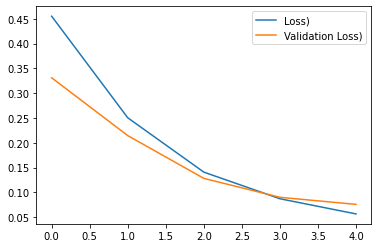

In [72]:
# loss per iteration 

import matplotlib.pyplot as plt
plt.plot(rnn.history['loss'],label='Loss)')
plt.plot(rnn.history['val_loss'],label='Validation Loss)')
plt.legend()
plt.show()

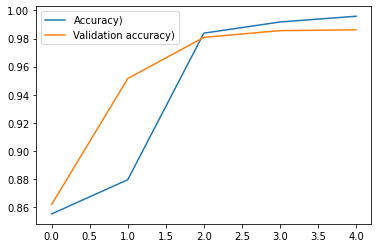

In [73]:
# accuracy per iteration

plt.plot(rnn.history['accuracy'],label='Accuracy)')
plt.plot(rnn.history['val_accuracy'],label='Validation accuracy)')
plt.legend()
plt.show()